In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from itertools import cycle
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from scipy import interp
import statsmodels.api as sm

from sklearn.model_selection import ShuffleSplit
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [29]:
df_cardio = pd.read_csv('Cardiotocography.csv', sep=',')

In [30]:
df_cardio.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [31]:
len(df_cardio.columns)

22

In [5]:
df_cardio.NSP.unique()

array([ 2.,  1.,  3., nan])

In [6]:
total_missing = df_cardio.isnull().sum().sort_values(ascending=False) 
                    #find the total null data values in each column based on percentage of data points in each column 

percent_missing = (df_cardio.isnull().sum()/df_cardio.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
NSP,3,0.001409
Nmax,3,0.001409
AC,3,0.001409
Tendency,3,0.001409
Width,3,0.001409
Min,3,0.001409
Max,3,0.001409
LB,3,0.001409
Nzeros,3,0.001409
Mode,3,0.001409


In [7]:
df_cardio.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009702,0.004371,0.001895,0.000004,0.000161,47.008933,1.335449,9.884814,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.047762,0.002954,0.002973,0.000061,0.000599,17.210648,0.891543,18.476534,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


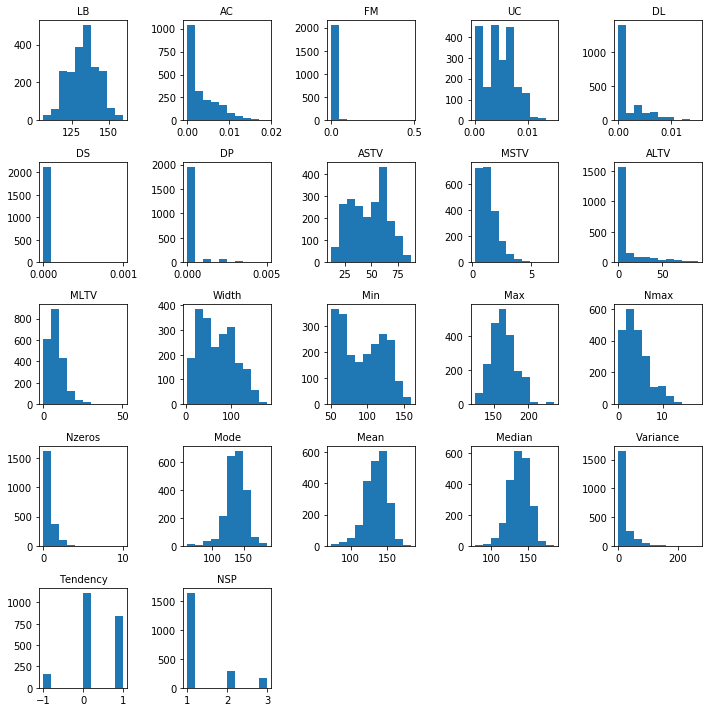

In [8]:
plt.figure(figsize=(10,10)) #visualize the distributions of column data
i = 1
#print(df.columns)
for column in df_cardio.columns: 
    plt.subplot(5,5,i)
    plt.hist(df_cardio[column])
    plt.title(df_cardio[column].name,fontsize=10)
    i+=1
plt.tight_layout()
plt.show()

In [10]:
null_data = df_cardio[df_cardio.isnull().any(axis=1)]
null_data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,0.481,0.015,0.015,0.001,0.005,87.0,7.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
null_data.to_html('null_data.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 null_data.html null_data.png', shell=True)

127

In [32]:
df_cardio = df_cardio.dropna()

In [33]:
total_missing = df_cardio.isnull().sum().sort_values(ascending=False) 
                    #find the total null data values in each column based on percentage of data points in each column 

percent_missing = (df_cardio.isnull().sum()/df_cardio.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
NSP,0,0.0
Tendency,0,0.0
AC,0,0.0
FM,0,0.0
UC,0,0.0


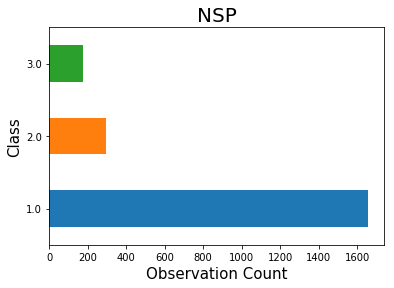

In [34]:
df_cardio['NSP'].value_counts()[:].plot(kind='barh')
plt.title('NSP',fontsize=20)
plt.xlabel('Observation Count',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.savefig('target__distribution.png')

### Balancing the Target Class

In [35]:
# Separate majority and minority classes
df_majority = df_cardio[df_cardio.NSP==1]
df_minority_two = df_cardio[df_cardio.NSP==2]
df_minority_three = df_cardio[df_cardio.NSP==3]
 
# Upsample minority class
df_minority_two_upsampled = resample(df_minority_two, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_three_upsampled = resample(df_minority_three, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_two_upsampled,df_minority_three_upsampled])
 
# Display new class counts
df_cardio = df_upsampled
df_upsampled.NSP.value_counts()

3.0    1655
2.0    1655
1.0    1655
Name: NSP, dtype: int64

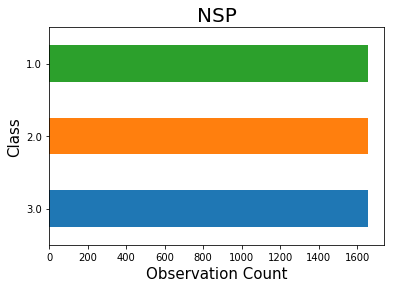

In [36]:
df_cardio['NSP'].value_counts()[:].plot(kind='barh')
plt.title('NSP',fontsize=20)
plt.xlabel('Observation Count',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.savefig('target__upsampled.png')

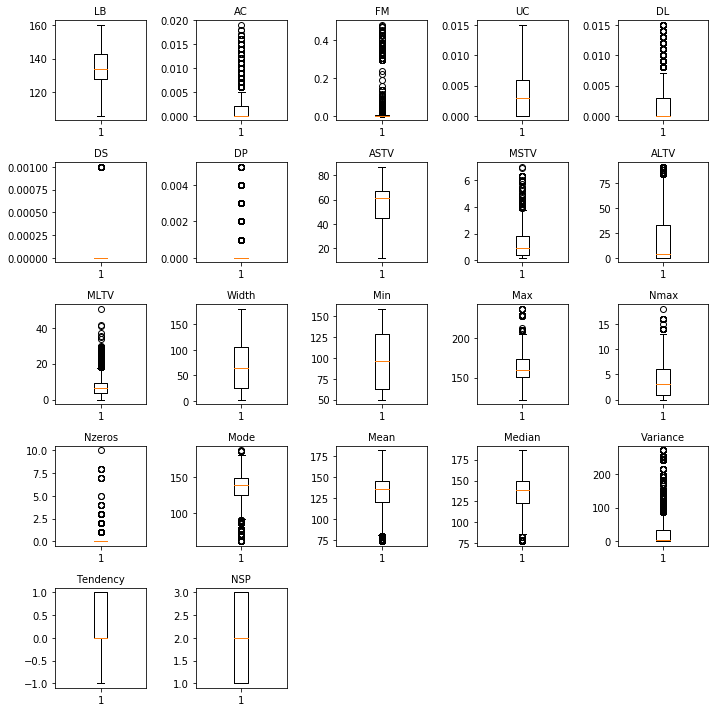

In [303]:
plt.figure(figsize=(10,10)) #visualize cleaned column data
i = 1
#print(df.columns)
for column in df_cardio.columns: 
    plt.subplot(5,5,i)
    plt.boxplot(df_cardio[column])
    plt.title(df_cardio[column].name,fontsize=10)
    i+=1
plt.tight_layout()
plt.show()

In [293]:
#df_int = df_cardio.select_dtypes(include=['float64','int'])
    
#for col in df_int:
#    df_cardio = df_cardio[((df_cardio[col] - df_cardio[col].mean()) / df_cardio[col].std()).abs() < 3] 


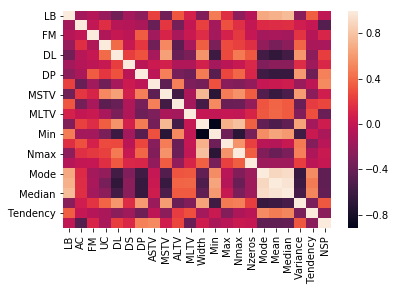

In [37]:
sns_corr_plot = sns.heatmap(df_cardio.corr())
fig = sns_corr_plot.get_figure()
fig.savefig('heatmap.png') 

In [38]:
def get_interaction_corr(corr, threshold):
   col_headers = corr.index.values
   for row in range(len(corr)):
       for col in range(row):
           if (corr.iloc[row, col] > threshold) or (corr.iloc[row, col] < -threshold):
               print("{}, {}: corr. = {}".format(col_headers[row], col_headers[col], corr.iloc[row, col]))
get_interaction_corr(df_cardio.corr(),.85)

Min, Width: corr. = -0.9176436954869923
Mean, Mode: corr. = 0.8988092757851438
Median, Mode: corr. = 0.9218796277398413
Median, Mean: corr. = 0.9560511748500029


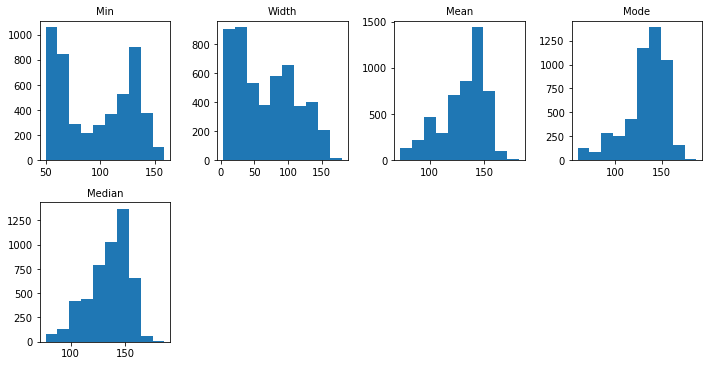

In [24]:
df = df_cardio[['Min','Width','Mean','Mode','Median']]

plt.figure(figsize=(10,10)) #visualize the distributions of column data
i = 1
#print(df.columns)
for column in df.columns: 
    plt.subplot(4,4,i)
    plt.hist(df[column])
    plt.title(df[column].name,fontsize=10)
    i+=1
plt.tight_layout()
plt.savefig('column_dist_{}.png'.format(i))
plt.show()

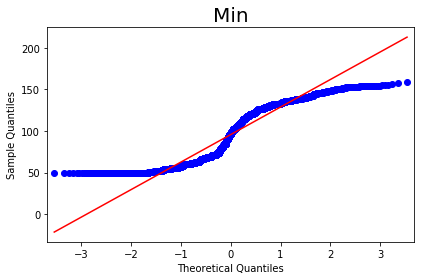

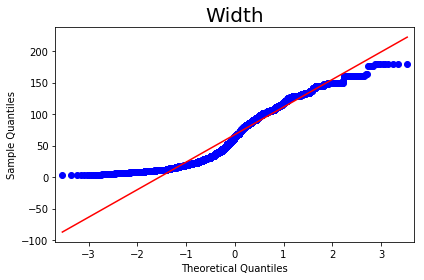

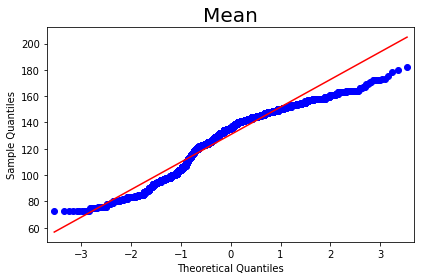

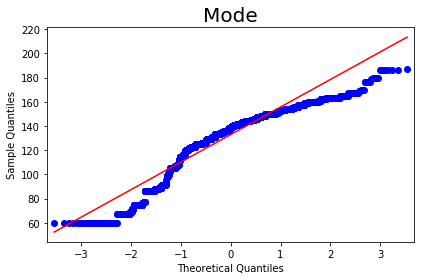

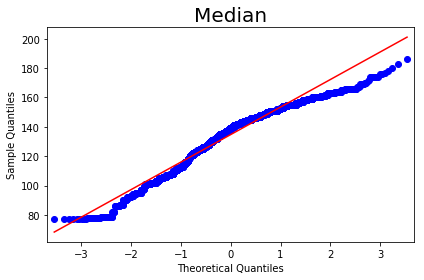

In [25]:
from statsmodels.graphics.gofplots import qqplot

i = 1
for column in df.columns: 
    
    qqplot(df[column], line='s') #Create QQplot to investigate the normality of age data
    plt.title(df[column].name,fontsize=20)  
    i+=1

    plt.tight_layout()
    plt.savefig('qqplot_{}.png'.format(i))
    plt.show()

In [39]:
df_cardio = df_cardio.drop(['Min','Mean','Mode'], axis=1)

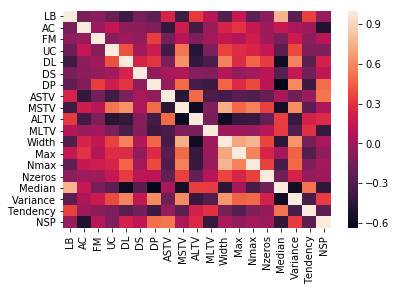

In [40]:
sns_corr_plot = sns.heatmap(df_cardio.corr())
fig = sns_corr_plot.get_figure()
fig.savefig('heatmap_revised.png') 

In [28]:
df_cardio.groupby('NSP').mean()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Max,Nmax,Nzeros,Median,Variance,Tendency
NSP,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,8.705498,73.400000,164.485801,4.163142,0.335347,138.459819,17.479758,0.341994
2.0,141.686405,0.000253,0.008842,0.002350,0.000555,0.000000e+00,0.000091,62.317825,0.633837,29.893051,7.953414,49.335952,162.520242,3.267069,0.236254,146.992145,6.957704,0.424169
3.0,131.584894,0.000397,0.023921,0.003868,0.003778,3.564955e-05,0.001302,64.550453,1.590574,21.611480,3.628761,79.402417,162.264653,4.396979,0.358308,118.812085,52.814502,-0.069486
